# CNN Model Pipeline

## Imports Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from src import figures_dir
from src.paths import data_dir, model_dir, outputs_dir

## Setup Data

In [13]:
train_dir = data_dir / "Train"
test_dir = data_dir / "Test"
train_csv_path = data_dir / "Train.csv"
figures_dir = outputs_dir / "figures"

## Load & Preprocess Images

In [4]:
data, labels = [], []
classes = 43

for class_id in range(classes):
    class_path = train_dir / str(class_id)
    images = os.listdir(class_path)

    for image_name in images:
        image_path = class_path / image_name
        image = Image.open(image_path).resize((30, 30))
        data.append(np.array(image))
        labels.append(class_id)

data = np.array(data)
labels = np.array(labels)

print(f"✔️ Data Loaded: {data.shape}, {labels.shape}")

✔️ Data Loaded: (39209, 30, 30, 3), (39209,)


## Data Splitting & Label Encoding

In [8]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)

print(f"✔️ Data Split: ")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape},")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape},")

✔️ Data Split: 
x_train: (31367, 30, 30, 3), y_train: (31367, 43),
x_val: (7842, 30, 30, 3), y_val: (7842, 43),


## Build CNN Model

In [9]:
model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(30,30,3)),
    Conv2D(64, (5,5), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.15),

    Conv2D(128, (3,3), activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.20),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/Users/yassientawfik/Documents/Career/Projects/PythonVenv/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-31 10:13:03.653584: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-07-31 10:13:03.653758: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-31 10:13:03.653763: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1753945983.654304 1517772 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1753945983.654363 1517772 pluggable_device_factory.cc:271] Created TensorFlow device (/job:loca

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,939 (6.20 MB)

 Trainable params: 1,624,939 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train CNN Model

In [10]:
history = model.fit(
    x_train, y_train, batch_size= 128, epochs=35, validation_data=(x_val, y_val)
)

Epoch 1/35


2025-07-31 10:16:02.279156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.2743 - loss: 7.2401 - val_accuracy: 0.8592 - val_loss: 0.8696
Epoch 2/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8231 - loss: 1.7435 - val_accuracy: 0.9703 - val_loss: 0.3492
Epoch 3/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9049 - loss: 1.8368 - val_accuracy: 0.9756 - val_loss: 0.3802
Epoch 4/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9484 - loss: 1.1591 - val_accuracy: 0.9718 - val_loss: 1.0045
Epoch 5/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9449 - loss: 2.8169 - val_accuracy: 0.9443 - val_loss: 3.3307
Epoch 6/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9545 - loss: 3.5797 - val_accuracy: 0.9776 - val_loss: 2.5054
Epoch 7/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9653 - loss: 3.8391 - val_accuracy: 0.9753 - val_loss: 4.4254
Epoch 8/35
246/246 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9643 - loss: 7.5667 - val_accuracy

## Visualize Training Performance

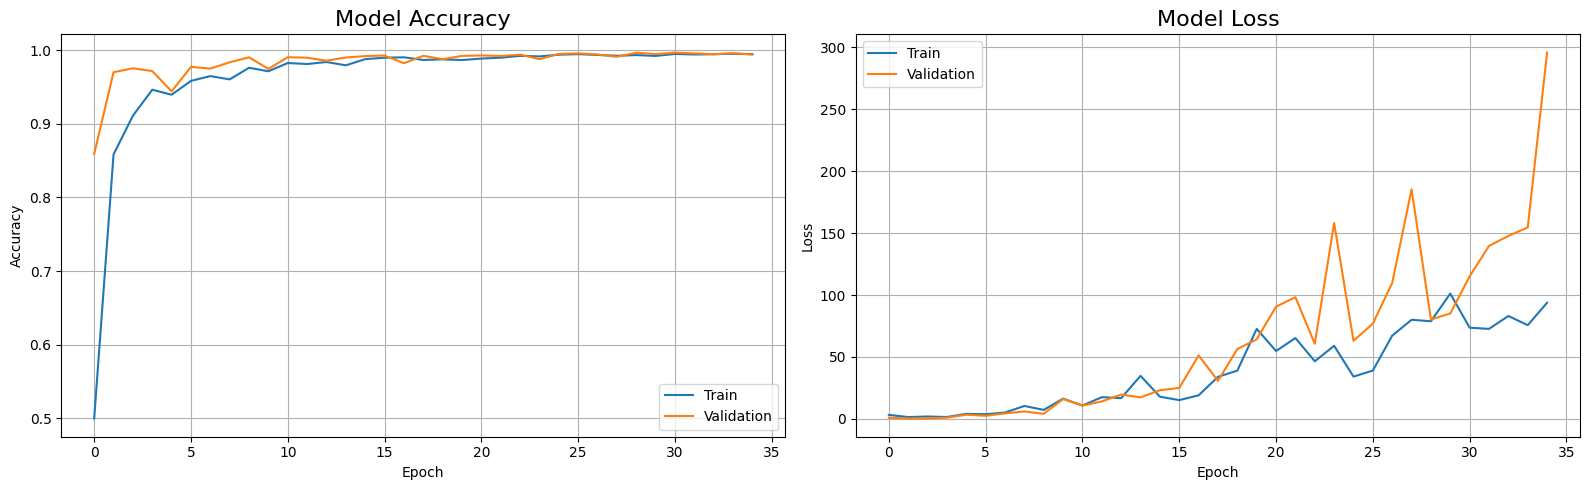

In [14]:
plt.figure(figsize=(16,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig(figures_dir / "training_performance.png", dpi=300)
plt.show()

## Save Model Training

In [15]:
model.save(model_dir / 'custom_traffic_classifier.h5')
print("✔️ Model saved successfully.")

✔️ Model saved successfully.
